<a href="https://colab.research.google.com/github/Anagefilho/Trabalho_IA.M/blob/main/N_rainhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitness, anotando quanto as rainhas se colidem horizontalmente e verticalmente em cada individuo.

In [4]:
def fitnessScore(pop,n_pop):
  fit = np.zeros([pop[:,1].size, 1],dtype=int) #Criacao da array do fit do tamanho da populacao, a matriz contem 1 coluna com pop.size linhas.
  colide_diagonal = 0
  colide_linha = 0

  for i in range(n_pop): #for para passar em toda populacao atual.
    colide_linha = len(pop[i]) - len(np.unique(pop[i])) # se existir números iguais na linha as rainhas estao se colidindo horizontalmente.

    x = pop[i]
    colide_diagonal = 0

    for k in range(len(x)): # k e criado para comparar a posicao da peca atual com todas pecas do tabuleiro.

      for j in range(len(x)): # j criado para ser comparado com k
          if j != k:
            delta_x = abs(k - j) # diferenca das colunas da peca atual k com as outras pecas j
            delta_y = abs(x[k] - x[j]) # diferenca entre peca atual x[k] com as outras do tabuleiro x[j], diferenca das linhas de cada rainha

            if(delta_x == delta_y): # quando as diferencas entre as colunas (delta_x) e a diferenca entre as linhas sao iguais temos uma colisao diagonal. 
              colide_diagonal += 1

      fit[i,0] = colide_linha + colide_diagonal

  return fit

#Crossover 2 pontos e crossover PMX

In [133]:
def crossover2X(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = int(n/4)
    y = int(n/2)
    
    p11 = pai1[0:x]
    p1m = pai1[x:y]
    p1m2 = pai1[y:x+y]
    p12 = pai1[x+y:n]

    p21 = pai2[0:x]
    p2m = pai2[x:y]
    p2m2 = pai2[y:x+y]
    p22 = pai2[x+y:n]
    
    filho1 = np.concatenate([p11,p2m,p2m2,p12])
    filho2 = np.concatenate([p21,p1m,p1m2,p22])
    
    filho1 = MutacaoDupla(filho1) #Aplicando a mutacao dupla 
    filho2 = MutacaoDupla(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

def crossoverPMX(pai1, pai2):
    size = min(len(pai1), len(pai2))
    p1, p2 = [0] * size, [0] * size

    # Initialize the position of each indices in the individuals
    for i in range(size):
        p1[pai1[i]] = i
        p2[pai2[i]] = i
    # Choose crossover points
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else:  # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    # Apply crossover between cx points
    for i in range(cxpoint1, cxpoint2):
        # Keep track of the selected values
        temp1 = pai1[i]
        temp2 = pai2[i]
        # Swap the matched value
        pai1[i], pai1[p1[temp2]] = temp2, temp1
        pai2[i], pai2[p2[temp1]] = temp1, temp2
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
    #filho1 = np.zeros([len(pai1)-1],dtype=int) #Inicia filhos
    #filho2 = np.zeros([len(pai2)-1], dtype=int)

    pai1 = Mutacao(pai1) #Aplicando a mutacao dupla 
    pai2 = Mutacao(pai2)
    filhos = np.vstack([pai1, pai2])
    return filhos



# Mutacões, e dupla mutacao

In [125]:
#Mutacões
def Mutacao(filho, Mutacao_prob=.20): #probabilidade de mutacao de 80% para dar mais diversividade ao modelo mas sem mutacao dupla
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(filho), 4, replace=False)
        temp = filho[ind[0]]
        filho[ind[0]] = filho[ind[1]]
        filho[ind[1]] = temp
        return filho       

      else:
        return filho

def MutacaoDupla(filho, Mutacao_prob=.40): #probabilidade de mutacao de 80% para dar mais diversividade ao modelo, e tem a chance de ocorrer mutacao dupla.
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(filho), 4, replace=False)
        temp = filho[ind[0]]
        filho[ind[0]] = filho[ind[1]]
        filho[ind[1]] = temp
        
        if (p > 0.7): #Mutacao dupla, 0.2% de chance
          temp2 = filho[ind[2]]
          filho[ind[2]] = filho[ind[3]]
          filho[ind[3]] = temp2
          
      return filho

#Seleções e funcao de imprimir tabuleiro

In [126]:
#Avaliacao, checa fitness
def selecao_ranking(pop, n_pop):
    pop = pop[pop[:,n].argsort()][0:n_pop, :] #retorna uma lista com a populacao ordenada pelo fitting score
    return pop #pegamos os 2 melhores pais da populacao atual.

def selecao_aleatoria(pop, n_pop):
    pai_aleatorio = random.randint(0, n_pop/2)
    pai_aleatorio2 = random.randint(0, n_pop/2)
    return pop[pai_aleatorio],pop[pai_aleatorio2] # 2 pais aleatorios da metade da populacao. 

def lista_probabilidade(pop):
    fitness = pop[:,[n]]
    total_fit = float(sum(fitness))
    relative_fitness = [f/total_fit for f in fitness]
    probabilities = [sum(relative_fitness[:i+1]) 
                     for i in range(len(relative_fitness))]
    return probabilities

def selecao_roleta(pop, probabilities, n_pop):
    chosen = []
    for n in range(n_pop):
        r = random.random()
        for (i, individual) in enumerate(pop):
            if r <= probabilities[i]:
                chosen.append(list(individual))
                break
    esc = np.array(chosen)
    return esc

def tabuleiro(pop, n): # Desenha o tabuleiro
    tabuleiro = np.zeros((n,n,3))
    tabuleiro += 0.5 # Inicializa o tabuleiro com cor preta em todas as casas da matriz
    tabuleiro[::2, ::2] = 1 # Cor branca
    tabuleiro[1::2, 1::2] = 1 # Cor branca restantes

    positions = pop[0,:n] # A melhor populacao

    fig, ax = plt.subplots()
    ax.imshow(tabuleiro, interpolation='nearest')

    for y, x in enumerate(positions):
        ax.text(x, y, u'\u2655', size=15, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    
    plt.show()

def inicializa(pop, n_pop):
  for i in range(n_pop):
    pop[i, :] = np.random.permutation(n) #Inicializaçao da populaçao com permutacões dos númeoros de 0 ate n.
  return pop

#Inicializacao e looping (Exemplo com geracões)

# Alteracões possiveis no codigo
1.   Escolher tipo de selecao: selecao_ranking, selecao_roleta
2.   Crossover: crossoverPMX / crossover2X
3.   Mutacao: Mutacao / MutacaoDupla



# A.G Com crossover de vários pais gerando vários filhos para serem avaliados

Número de rainhas:  8
Número de geracões:  420
Melhor solucao:  [5 2 0 7 4 1 3 6]
Número de conflitos:  0


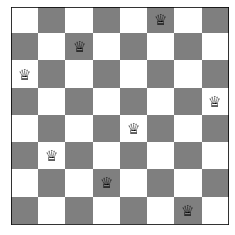

In [137]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criacao do algoritmo genetico

#Representacao
#Inicializacao
#Avaliacao
#Loop
#Selecao
#Cruzamento
#Mutacao
#Avaliacao
#Reinsercao

#Representacao por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse individuo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicializacao
#n = int(input("Digite o número de rainhas: "))
#n_pop = int(input("Número da populacao: "))
n = 8
n_pop = 200
generation = 0

pop = np.zeros([n_pop,n],dtype=int)
IndAleatorio = np.zeros(1)

for i in range(n_pop):
    pop[i, :] = np.random.permutation(n) #Inicializacao da populacao com permutacões dos númeoros de 0 ate n.

fit = fitnessScore(pop,n_pop) # calcula de todos da populacao atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada individuo da populacao.

pop = pop[pop[:,n].argsort()][0:n_pop, :] # Retorna a populacao ordenada pelo fitting 

#Loop
while(pop[0][n] != 0):
    generation+=1
    if generation % 1000 == 0:
      print("Geracao: ", generation, "\nMelhor individuo: ", pop[0], "Nº de conflitos: ", pop[0,n])
      for i in range(int(n_pop/2),n_pop):# Tentativa de recomeco aleatorio, adiciona um individuo aleatorio no final para fugir de otimos locais.
          pop[i, :n] = np.random.permutation(n) # Elimina metade da população e substitui por novos indivíduos aleatórios 
    
    #probability = lista_probabilidade(pop)
    #pais = selecao_roleta(pop, probability, n_pop)  #Seleções
    pais = selecao_ranking(pop, n_pop)
    #pais = selecao_aleatoria(pop, n_pop)
    
    for i in range(int(len(pais)/2)): #Crossover com metade dos pais da populacao
      filhos = crossoverPMX(pais[i,:n],pais[i+1,:n]) #Crossover PMX e mutacao simples
      #filhos = crossover2X(pais[i],pais[i+1]) #Crossover multiplo e mutacao dupla
    
    #print(filhos)
    fit_filhos = fitnessScore(filhos,len(filhos))
    filhos = np.hstack([filhos,fit_filhos])

    pop = np.vstack([pop,filhos]) # Reinsercao
    pop = pop[pop[:,n].argsort()][0:n_pop, :] # Atualiza pop pegando os N melhores individuos 

    if generation > 9999: #Falhou, tenta criar uma nova população
      break

print("Número de rainhas: ", n)
print("Número de geracões: ", generation)
print("Melhor solucao: ", pop[0, 0:n])
print("Número de conflitos: ", pop[0][n])
tabuleiro(pop, n)